In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn import set_config
set_config(transform_output="pandas")
#warnings.simplefilter('ignore')
# import plotly.express as px

In [2]:
df = pd.read_csv("data/AQUASTAT_complete.csv", index_col=0)

In [3]:
df.head()

,Country,M49,Variable,Year,Unit,Symbol,Symbol Description,Value
0,Samoa,882,Total area of the country (excl. coastal water),2020,1000 ha,E,Estimate either calculated as sum or identify ...,279.000000
1,Samoa,882,Cultivated area (arable land + permanent crops),2020,1000 ha,X,External value (reported by FAOSTAT or another...,43.000000
2,Samoa,882,Population density,2020,inhab/km2,E,Estimate either calculated as sum or identify ...,71.116129
3,Samoa,882,"Agriculture, value added (% GDP)",2020,%,X,External value (reported by FAOSTAT or another...,10.543126
4,Samoa,882,Rural population with access to safe drinking-...,2020,%,I,"Imputed (carry forward, vertical imputation, l...",99.300000


create unit dict

In [4]:
def transform_name(col):
    col = col.replace("_(NRI)","")
    col = col.replace("_(GDP)","")
    col = col.replace("_(JMP)","")
    col = col.replace("_(IRWR)","")
    col = col.replace("SDG_6.4.1._","")
    col = col.replace("SDG_6.4.2._","")
    col = col.replace("-","_")
    col = col.replace(":","")
    col = col.replace(".","")
    col = col.replace(",","")
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.lower()
    col = col.replace("+","plus")
    col = col.replace(" ","_")

    return col

In [5]:
unit_dict =  {}
for var in df.Variable.unique():
    var_trans = transform_name(var)
    unit_dict[var_trans] = df.query("Variable == @var")["Unit"].unique()[0]

In [6]:
unit_dict

{'total_area_of_the_country_excl_coastal_water': '1000 ha',
 'cultivated_area_arable_land_plus_permanent_crops': '1000 ha',
 'population_density': 'inhab/km2',
 'agriculture_value_added_%_gdp': '%',
 'rural_population_with_access_to_safe_drinking_water_jmp': '%',
 'groundwater_entering_the_country_total': '10^9 m3/year',
 'total_renewable_groundwater': '10^9 m3/year',
 'dam_capacity_per_capita': 'm3/inhab',
 'gdp_deflator_2015': nan,
 'arable_land_area': '1000 ha',
 'total_population_with_access_to_safe_drinking_water_jmp': '%',
 'urban_population_with_access_to_safe_drinking_water_jmp': '%',
 'surface_water_inflow_secured_through_treaties': '10^9 m3/year',
 'surface_water_accounted_inflow': '10^9 m3/year',
 'total_dam_capacity': 'km3',
 'produced_municipal_wastewater': '10^9 m3/year',
 'area_equipped_for_full_control_irrigation_sprinkler_irrigation': '1000 ha',
 '%_of_agricultural_water_managed_area_equipped_for_irrigation': '%',
 '%_of_area_equipped_for_irrigation_power_irrigated': '

In [7]:
df.query("Variable=='Dam capacity per capita'")#.describe()

,Country,M49,Variable,Year,Unit,Symbol,Symbol Description,Value
7,Samoa,882,Dam capacity per capita,2020,m3/inhab,E,Estimate either calculated as sum or identify ...,50.399669
1002,South Africa,710,Dam capacity per capita,1968,m3/inhab,E,Estimate either calculated as sum or identify ...,151.367637
1003,Suriname,740,Dam capacity per capita,1968,m3/inhab,E,Estimate either calculated as sum or identify ...,56093.114570
1004,Niger,562,Dam capacity per capita,1968,m3/inhab,E,Estimate either calculated as sum or identify ...,1.822264
1005,Guyana,328,Dam capacity per capita,1968,m3/inhab,E,Estimate either calculated as sum or identify ...,265.264244
...,...,...,...,...,...,...,...,...
809229,Cameroon,120,Dam capacity per capita,2008,m3/inhab,E,Estimate either calculated as sum or identify ...,810.829160
809230,Jordan,400,Dam capacity per capita,2008,m3/inhab,E,Estimate either calculated as sum or identify ...,41.931049
809231,Turkmenistan,795,Dam capacity per capita,2008,m3/inhab,E,Estimate either calculated as sum or identify ...,1133.461122
809232,Azerbaijan,31,Dam capacity per capita,2008,m3/inhab,E,Estimate either calculated as sum or identify ...,2441.930415


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 811078 entries, 0 to 811077
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             811078 non-null  object 
 1   M49                 811078 non-null  int64  
 2   Variable            811078 non-null  object 
 3   Year                811078 non-null  int64  
 4   Unit                779362 non-null  object 
 5   Symbol              662333 non-null  object 
 6   Symbol Description  811078 non-null  object 
 7   Value               811078 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 55.7+ MB


In [9]:
df.drop(columns=["M49", "Symbol", "Symbol Description"], inplace = True)

In [10]:
df.head()

,Country,Variable,Year,Unit,Value
0,Samoa,Total area of the country (excl. coastal water),2020,1000 ha,279.000000
1,Samoa,Cultivated area (arable land + permanent crops),2020,1000 ha,43.000000
2,Samoa,Population density,2020,inhab/km2,71.116129
3,Samoa,"Agriculture, value added (% GDP)",2020,%,10.543126
4,Samoa,Rural population with access to safe drinking-...,2020,%,99.300000


In [11]:
df.Country.nunique()

200

In [12]:
df.Year.nunique()

57

In [13]:
df.Variable.nunique()

193

In [14]:
targets = ["Total population with access to safe drinking-water (JMP)", "GDP per capita", "Water stress"]

filter for number of countries and number of years per variable

In [15]:
exclude_list = []
for var in df.Variable.unique()[:]:
    if var in targets:  continue
    df_temp = df.query("Variable==@var")
    if df_temp.Country.nunique()<=130 and df_temp.Year.nunique()<=30:
        print(var, ":")
        print("n countries: ", df_temp.Country.nunique())
        print("n years: ", df_temp.Year.nunique())
        # print(df_temp.isna().sum())
        # print(df_temp.isna().sum().max())
        print("")
        exclude_list.append(var)
    #display(df_temp)

Water withdrawal for livestock (watering and cleaning) :
n countries:  70
n years:  21

Water withdrawal for aquaculture :
n countries:  52
n years:  30

Harvested irrigated temporary crop area: Sweet potatoes :
n countries:  17
n years:  26

Harvested irrigated permanent crop area: Plantains :
n countries:  10
n years:  17

Number of people undernourished (3-year average) :
n countries:  120
n years:  29

% of area equipped for irrigation drained :
n countries:  50
n years:  30

Harvested irrigated temporary crop area: Millet :
n countries:  14
n years:  28

Direct use of agricultural drainage water :
n countries:  34
n years:  28

Harvested irrigated temporary crop area: Sorghum :
n countries:  31
n years:  29

Harvested irrigated temporary crop area: Cassava :
n countries:  9
n years:  24

Population affected by water related disease :
n countries:  32
n years:  29

Direct use of treated municipal wastewater for irrigation purposes :
n countries:  43
n years:  27

Harvested irrigate

In [16]:
len(exclude_list)

24

In [17]:
df_short = df.query("Variable not in @exclude_list")

only consider data from 2001 until 2020

In [18]:
df_short = df_short.query("Year > 2000")

In [19]:
df_short.groupby(["Country","Variable","Year"]).count()

Unit  \
Country     Variable                                           Year         
Afghanistan % of agricultural GVA produced by irrigated agr... 2001     1   
                                                               2002     1   
                                                               2003     1   
                                                               2004     1   
                                                               2005     1   
...                                                                   ...   
Zimbabwe    Water withdrawal for cooling of thermoelectric ... 2016     1   
                                                               2017     1   
                                                               2018     1   
                                                               2019     1   
                                                               2020     1   

                                                                     Value  
Country     Variable                                           Year         
Afghanistan % of agricultural GVA produced by irrigated agr... 2001      1  
                                                               2002      1  
                                                               2003      1  
                                                               2004      1  
                                                               2005      1  
...                                                                    ...  
Zimbabwe    Water withdrawal for cooling of thermoelectric ... 2016      1  
                                                               2017      1  
                                                               2018      1  
                                                               2019      1  
                                                               2020      1  

[401568 rows x 2 columns]

filter for variables that have at least 3000 entries in the remaining data set

In [20]:
n_entry_dict = df_short.groupby("Variable").count().sort_values("Value")[["Value"]].to_dict()["Value"]
drop_list = [k for k,val in n_entry_dict.items() if val<3000]
print(len(n_entry_dict), len(drop_list))

169 90


In [21]:
df_shorter = df_short.query("Variable not in @drop_list")

In [22]:
df_shorter.set_index(["Country", "Year"])

Variable  \
Country                            Year                                                      
Samoa                              2020    Total area of the country (excl. coastal water)   
                                   2020    Cultivated area (arable land + permanent crops)   
                                   2020                                 Population density   
                                   2020                   Agriculture, value added (% GDP)   
                                   2020  Rural population with access to safe drinking-...   
...                                                                                    ...   
Bhutan                             2008                                GDP Deflator (2015)   
Venezuela (Bolivarian Republic of) 2008                                GDP Deflator (2015)   
Pakistan                           2008                                GDP Deflator (2015)   
Latvia                             2008                                GDP Deflator (2015)   
Solomon Islands                    2008                                GDP Deflator (2015)   

                                              Unit       Value  
Country                            Year                         
Samoa                              2020    1000 ha  279.000000  
                                   2020    1000 ha   43.000000  
                                   2020  inhab/km2   71.116129  
                                   2020          %   10.543126  
                                   2020          %   99.300000  
...                                            ...         ...  
Bhutan                             2008        NaN   95.752700  
Venezuela (Bolivarian Republic of) 2008        NaN   87.838100  
Pakistan                           2008        NaN   71.954400  
Latvia                             2008        NaN  127.761100  
Solomon Islands                    2008        NaN   79.955100  

[286263 rows x 3 columns]

pivot

In [23]:
df_pivot = df_shorter.pivot_table(index=["Country","Year"], columns="Variable", values="Value")

In [24]:
df_pivot

Variable          % of agricultural GVA produced by irrigated agriculture  \
Country     Year                                                            
Afghanistan 2001                                          44.702708         
            2002                                          44.684011         
            2003                                          37.646401         
            2004                                          53.059409         
            2005                                          43.148507         
...                                                             ...         
Zimbabwe    2016                                           7.286943         
            2017                                           7.193453         
            2018                                           7.099892         
            2019                                           7.099892         
            2020                                           7.099892         

Variable          % of agricultural water managed area equipped for irrigation  \
Country     Year                                                                 
Afghanistan 2001                                         100.000000              
            2002                                         100.000000              
            2003                                         100.000000              
            2004                                         100.000000              
            2005                                         100.000000              
...                                                             ...              
Zimbabwe    2016                                          91.081382              
            2017                                          91.296306              
            2018                                          90.474331              
            2019                                          90.474331              
            2020                                          90.474331              

Variable          % of area equipped for full control irrigation actually irrigated  \
Country     Year                                                                      
Afghanistan 2001                                          66.760212                   
            2002                                          66.708229                   
            2003                                          54.675810                   
            2004                                          85.785536                   
            2005                                          65.024938                   
...                                                             ...                   
Zimbabwe    2016                                          82.107356                   
            2017                                          76.680282                   
            2018                                          68.542030                   
            2019                                          68.542030                   
            2020                                          68.542030                   

Variable          % of the cultivated area equipped for irrigation  \
Country     Year                                                     
Afghanistan 2001                                         41.364633   
            2002                                         41.377531   
            2003                                         40.556258   
            2004                                         40.551131   
            2005                                         40.556258   
...                                                            ...   
Zimbabwe    2016                                          3.985366   
            2017                                          4.093415   
            2018                                          4.408902   
            2019             

In [25]:
df_pivot.reset_index(inplace=True)

In [26]:
#fig, ax = plt.subplots(1,1,figsize=(20,500))
#sns.heatmap(df_pivot.isna(), ax=ax)

In [27]:
data_sparse_countries = ['Andorra','Antigua and Barbuda', 'Bahamas','Bosnia and Herzegovina','Brunei Darussalam','Cook Islands','Dominica','Equatorial Guinea','Faroe Islands','Grenada','Holy See','Kiribati', 'Liechtenstein','Marshall Islands','Micronesia (Federated States of)','Monaco','Montenegro','Nauru','Niue','Palau','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Samoa','Serbia','San Marino', 'Sao Tome and Principe','Singapore', 'Seychelles','Solomon Islands','Tokelau','Tonga','Vanuatu','Djibouti','Maldives','Papua New Guinea','Tuvalu']

In [28]:
df_pivot_short = df_pivot.query("Country not in @data_sparse_countries")

In [29]:
df_pivot.Country.nunique()

200

In [30]:
df_pivot_short.Country.nunique()

163

In [31]:
for key, val in df_pivot_short.isna().sum().to_dict().items():
    print(key,'!',val)

Country ! 0
Year ! 0
% of agricultural GVA produced by irrigated agriculture ! 172
% of agricultural water managed area equipped for irrigation ! 40
% of area equipped for full control irrigation actually irrigated ! 326
% of the cultivated area equipped for irrigation ! 40
% of total country area cultivated ! 0
Agricultural water withdrawal ! 72
Agricultural water withdrawal as % of total renewable water resources ! 58
Agricultural water withdrawal as % of total water withdrawal ! 74
Agriculture, value added (% GDP) ! 0
Agriculture, value added to GDP ! 0
Arable land area ! 0
Area equipped for full control irrigation: actually irrigated ! 318
Area equipped for full control irrigation: total ! 40
Area equipped for irrigation: total ! 40
Cultivated area (arable land + permanent crops) ! 0
Dam capacity per capita ! 231
Dependency ratio ! 0
Environmental Flow Requirements ! 300
GDP Deflator (2015) ! 0
GDP per capita ! 0
Gross Domestic Product (GDP) ! 0
Groundwater produced internally ! 60

In [32]:
for key, val in df_pivot_short.query("Year > 2010").isna().sum().to_dict().items():
    print(key,'!',val)

Country ! 0
Year ! 0
% of agricultural GVA produced by irrigated agriculture ! 4
% of agricultural water managed area equipped for irrigation ! 10
% of area equipped for full control irrigation actually irrigated ! 32
% of the cultivated area equipped for irrigation ! 10
% of total country area cultivated ! 0
Agricultural water withdrawal ! 1
Agricultural water withdrawal as % of total renewable water resources ! 1
Agricultural water withdrawal as % of total water withdrawal ! 1
Agriculture, value added (% GDP) ! 0
Agriculture, value added to GDP ! 0
Arable land area ! 0
Area equipped for full control irrigation: actually irrigated ! 26
Area equipped for full control irrigation: total ! 10
Area equipped for irrigation: total ! 10
Cultivated area (arable land + permanent crops) ! 0
Dam capacity per capita ! 119
Dependency ratio ! 0
Environmental Flow Requirements ! 150
GDP Deflator (2015) ! 0
GDP per capita ! 0
Gross Domestic Product (GDP) ! 0
Groundwater produced internally ! 30
Ground

exclude repeating information and further sparse variables

In [33]:
dropdrop_list = ["GDP Deflator (2015)" , "Environmental Flow Requirements" , "Groundwater: accounted outflow to other countries" , "Groundwater: leaving the country to other countries (total)"]

In [34]:
df_pivot_shorter = df_pivot_short.drop(columns=dropdrop_list)

In [35]:
print(df_pivot_shorter.columns)

Index(['Country', 'Year',
       '% of agricultural GVA produced by irrigated agriculture',
       '% of agricultural water managed area equipped for irrigation',
       '% of area equipped for full control irrigation actually irrigated',
       '% of the cultivated area equipped for irrigation',
       '% of total country area cultivated', 'Agricultural water withdrawal',
       'Agricultural water withdrawal as % of total renewable water resources',
       'Agricultural water withdrawal as % of total water withdrawal',
       'Agriculture, value added (% GDP)', 'Agriculture, value added to GDP',
       'Arable land area',
       'Area equipped for full control irrigation: actually irrigated',
       'Area equipped for full control irrigation: total',
       'Area equipped for irrigation: total',
       'Cultivated area (arable land + permanent crops)',
       'Dam capacity per capita', 'Dependency ratio', 'GDP per capita',
       'Gross Domestic Product (GDP)', 'Groundwater produced 

In [36]:
df_pivot_shorter.shape

(3238, 77)

In [37]:
# start1 = 68
# start2 = 2

# limits1 = (start1, start1+6)
# limits2 = (start2, start2+75)

# vars1 = df_pivot_shorter.columns[limits1[0]:limits1[1]]
# vars2 = df_pivot_shorter.columns[limits2[0]:limits2[1]]

# print(vars1)
# print(vars2)

In [38]:
# fig, axs = plt.subplots(75,6, figsize=(30,400))

# for i, v1 in enumerate(vars1):
#     for j, v2 in enumerate(vars2):
#         sns.scatterplot(x=df_pivot_shorter[v2], y=df_pivot_shorter[v1], ax=axs[j,i])

# fig.tight_layout()

drop linear dependent variables

In [39]:
linear_drop_list = ["% of the cultivated area equipped for irrigation", "Area equipped for full control irrigation: actually irrigated", "Area equipped for full control irrigation: total", "MDG 7.5. Freshwater withdrawal as % of total renewable water resources", "Arable land area", "Area equipped for irrigation: total", "Long-term average annual precipitation in volume", "Long-term average annual precipitation in depth", "Groundwater produced internally","Surface water produced internally", "Permanent crops area", "Overlap between surface water and groundwater", "Overlap: between surface water and groundwater", "Rural population with access to safe drinking-water (JMP)", "Surface water: inflow not submitted to treaties", "Surface water: inflow submitted to treaties", "Surface water: accounted inflow", "Total renewable water resources", "Surface water: outflow to other countries secured through treaties", "Surface water: total external renewable", "Surface water: total flow of border rivers", "Surface water: accounted flow of border rivers", "Total renewable surface water", "% of area equipped for full control irrigation actually irrigated", "Surface water: outflow to other countries not submitted to treaties", "Surface water: outflow to other countries submitted to treaties", "Surface water: inflow secured through treaties", "Total freshwater withdrawal"]
drop_for_now_list = ["Human Development Index (HDI) [highest = 1]", "Industry, value added to GDP" , "Services, value added to GDP", "Agriculture, value added to GDP", "Industrial water withdrawal as % of total water withdrawal", "Municipal water withdrawal as % of total withdrawal"]

In [40]:
df_indy = df_pivot_shorter.drop(columns=linear_drop_list)
df_indy = df_indy.drop(columns=drop_for_now_list)

In [41]:
df_indy.shape

(3238, 43)

In [42]:
df_indy.head(3)

Variable,Country,Year,% of agricultural GVA produced by irrigated agriculture,% of agricultural water managed area equipped for irrigation,% of total country area cultivated,Agricultural water withdrawal,Agricultural water withdrawal as % of total renewable water resources,Agricultural water withdrawal as % of total water withdrawal,"Agriculture, value added (% GDP)",Cultivated area (arable land + permanent crops),...,Total internal renewable water resources per capita,Total population,Total population with access to safe drinking-water (JMP),Total renewable groundwater,Total renewable water resources per capita,Total water withdrawal,Total water withdrawal per capita,Urban population,Urban population with access to safe drinking-water (JMP),Water resources: total external renewable
0,Afghanistan,2001,44.702708,100.0,11.875440,20.0,30.613807,98.518576,54.063068,7753.0,...,2182.164400,21606.988,32.0,10.65,3023.558860,20.30074,939.545114,4648.139,54.1,18.18
1,Afghanistan,2002,44.684011,100.0,11.875440,20.0,30.613807,98.431107,45.134344,7753.0,...,2086.212107,22600.770,33.8,10.65,2890.609479,20.31878,899.030431,4893.013,55.9,18.18
2,Afghanistan,2003,37.646401,100.0,12.115921,20.0,30.613807,98.343792,41.903476,7910.0,...,1991.058521,23680.871,35.5,10.65,2758.766770,20.33682,858.786824,5155.788,57.8,18.18


improve names

In [43]:
df_indy.columns = df_indy.columns.str.replace(" ","_")

In [44]:
df_indy.head(3)

Variable,Country,Year,%_of_agricultural_GVA_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,Agricultural_water_withdrawal,Agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,Agricultural_water_withdrawal_as_%_of_total_water_withdrawal,"Agriculture,_value_added_(%_GDP)",Cultivated_area_(arable_land_+_permanent_crops),...,Total_internal_renewable_water_resources_per_capita,Total_population,Total_population_with_access_to_safe_drinking-water_(JMP),Total_renewable_groundwater,Total_renewable_water_resources_per_capita,Total_water_withdrawal,Total_water_withdrawal_per_capita,Urban_population,Urban_population_with_access_to_safe_drinking-water_(JMP),Water_resources:_total_external_renewable
0,Afghanistan,2001,44.702708,100.0,11.875440,20.0,30.613807,98.518576,54.063068,7753.0,...,2182.164400,21606.988,32.0,10.65,3023.558860,20.30074,939.545114,4648.139,54.1,18.18
1,Afghanistan,2002,44.684011,100.0,11.875440,20.0,30.613807,98.431107,45.134344,7753.0,...,2086.212107,22600.770,33.8,10.65,2890.609479,20.31878,899.030431,4893.013,55.9,18.18
2,Afghanistan,2003,37.646401,100.0,12.115921,20.0,30.613807,98.343792,41.903476,7910.0,...,1991.058521,23680.871,35.5,10.65,2758.766770,20.33682,858.786824,5155.788,57.8,18.18


In [45]:
for col in df_indy.columns.sort_values():
    print(col)

%_of_agricultural_GVA_produced_by_irrigated_agriculture
%_of_agricultural_water_managed_area_equipped_for_irrigation
%_of_total_country_area_cultivated
Agricultural_water_withdrawal
Agricultural_water_withdrawal_as_%_of_total_renewable_water_resources
Agricultural_water_withdrawal_as_%_of_total_water_withdrawal
Agriculture,_value_added_(%_GDP)
Country
Cultivated_area_(arable_land_+_permanent_crops)
Dam_capacity_per_capita
Dependency_ratio
GDP_per_capita
Gross_Domestic_Product_(GDP)
Groundwater:_accounted_inflow
Groundwater:_entering_the_country_(total)
Industrial_water_withdrawal
Municipal_water_withdrawal
National_Rainfall_Index_(NRI)
Population_density
Ratio_between_rainfed_and_irrigated_yields
Rural_population
SDG_6.4.1._Industrial_Water_Use_Efficiency
SDG_6.4.1._Irrigated_Agriculture_Water_Use_Efficiency
SDG_6.4.1._Services_Water_Use_Efficiency
SDG_6.4.1._Water_Use_Efficiency
SDG_6.4.2._Water_Stress
Surface_water:_entering_the_country_(total)
Surface_water:_leaving_the_country_to_o

In [46]:
colnames = []
for col in df_indy.columns:
    col = col.replace("_(NRI)","")
    col = col.replace("_(GDP)","")
    col = col.replace("_(JMP)","")
    col = col.replace("_(IRWR)","")
    col = col.replace("SDG_6.4.1._","")
    col = col.replace("SDG_6.4.2._","")
    col = col.replace("-","_")
    col = col.replace(":","")
    col = col.replace(".","")
    col = col.replace(",","")
    col = col.replace("(","")
    col = col.replace(")","")
    col = col.lower()
    col = col.replace("+","plus")
    colnames.append(col)
colnames

['country',
 'year',
 '%_of_agricultural_gva_produced_by_irrigated_agriculture',
 '%_of_agricultural_water_managed_area_equipped_for_irrigation',
 '%_of_total_country_area_cultivated',
 'agricultural_water_withdrawal',
 'agricultural_water_withdrawal_as_%_of_total_renewable_water_resources',
 'agricultural_water_withdrawal_as_%_of_total_water_withdrawal',
 'agriculture_value_added_%_gdp',
 'cultivated_area_arable_land_plus_permanent_crops',
 'dam_capacity_per_capita',
 'dependency_ratio',
 'gdp_per_capita',
 'gross_domestic_product',
 'groundwater_accounted_inflow',
 'groundwater_entering_the_country_total',
 'industrial_water_withdrawal',
 'municipal_water_withdrawal',
 'national_rainfall_index',
 'population_density',
 'ratio_between_rainfed_and_irrigated_yields',
 'rural_population',
 'industrial_water_use_efficiency',
 'irrigated_agriculture_water_use_efficiency',
 'services_water_use_efficiency',
 'water_use_efficiency',
 'water_stress',
 'surface_water_entering_the_country_total'

In [47]:
df_indy.columns = colnames

In [48]:
df_indy.total_dam_capacity.describe()

count    3007.000000
mean       45.885684
std       137.960847
min         0.000000
25%         0.333706
50%         5.271500
75%        23.260368
max       841.505700
Name: total_dam_capacity, dtype: float64

dependent dropping

In [49]:
df_indy = df_indy.drop(columns=["gross_domestic_product", "urban_population_with_access_to_safe_drinking_water"])

plot nan maps

In [50]:
# plt.close("all")
# for i, c in enumerate(df_indy.country.unique()):
#     fig, ax = plt.subplots(1,1, figsize=(10,4))
#     sns.heatmap(df_indy.query("country == @c").isna(), ax=ax)
#     ax.set_title(c)
#     #if i==1:    break
#     fig.savefig("images/"+c+"_nan_heatmap.png")

#### train test validation split

In [51]:
from sklearn.model_selection import train_test_split
RSEED = 5

In [52]:
targets = ['gdp_per_capita', 'water_stress', 'total_population_with_access_to_safe_drinking_water']

Y = df_indy[targets]
X = df_indy.drop(columns=targets)

X_train, X_pretest, Y_train, Y_pretest = train_test_split(X, Y, test_size=0.30, random_state=RSEED, stratify=X.country)
X_test, X_valid, Y_test, Y_valid = train_test_split(X_pretest, Y_pretest, test_size=0.50, random_state=RSEED, stratify=X_pretest.country)

In [53]:
Y_test.shape

(486, 3)

imputation

In [54]:
#Qatar:
index_list = X_train.query("country == 'Qatar'").index
X_train.loc[index_list,'dam_capacity_per_capita'] = 0
X_train.loc[index_list,'total_dam_capacity'] = 0
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#Republic of Korea:
index_list = X_train.query("country == 'Republic of Korea'").index
X_train.loc[index_list,'national_rainfall_index'] = 1150

#Saudi Arabia:
index_list = X_train.query("country == 'Saudi Arabia'").index
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0
X_train.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0

#South Sudan:
index_list = X_train.query("country == 'South Sudan'").index
X_train.loc[index_list,'national_rainfall_index'] = 0
X_train.loc[index_list,'total_dam_capacity'] = 0
X_train.loc[index_list,'dam_capacity_per_capita'] = 0

#Sudan:
index_list = X_train.query("country == 'Sudan'").index
X_train.loc[index_list,'national_rainfall_index'] = 257

#Timor-Leste:
index_list = X_train.query("country == 'Timor-Leste'").index
X_train.loc[index_list,'national_rainfall_index'] = 1500
X_train.loc[index_list,'total_dam_capacity'] = 0
X_train.loc[index_list,'dam_capacity_per_capita'] = 0

#Turkmenistan:
index_list = X_train.query("country == 'Turkmenistan'").index
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#United Arab Emirates:
index_list = X_train.query("country == 'United Arab Emirates'").index
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#Yemen:
index_list = X_train.query("country == 'Yemen'").index
X_train.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Iceland#
index_list = X_train.query("country == 'Iceland'").index
X_train.loc[index_list,'%_of_agricultural_water_managed_area_equipped_for_irrigation'] = 0
X_train.loc[index_list,'total_agricultural_water_managed_area'] = 0
#Iraq#
index_list = X_train.query("country == 'Iraq'").index
X_train.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Israel#
index_list = X_train.query("country == 'Israel'").index
X_train.loc[index_list,'dam_capacity_per_capita'] = 0
X_train.loc[index_list,'total_dam_capacity'] = 0
#Jordan#
index_list = X_train.query("country == 'Jordan'").index
X_train.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Kuwait#
index_list = X_train.query("country == 'Kuwait'").index
X_train.loc[index_list,'dam_capacity_per_capita'] = 0
X_train.loc[index_list,'total_dam_capacity'] = 0
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 1.24
#Malta#
index_mal = X_train.query("country == 'Malta'").index
X_train.loc[index_mal,'national_rainfall_index'] = 568
#Luxembourg
index_list = X_train.query("country == 'Luxembourg'").index
X_train.loc[index_list,'national_rainfall_index'] = 847.9
#Mauritius#
index_list = X_train.query("country == 'Mauritius'").index
X_train.loc[index_list,'national_rainfall_index'] = 2342
#Oman#
index_list = X_train.query("country == 'Oman'").index
X_train.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 1.24
X_train.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Palestine#
index_list = X_train.query("country == 'Palestine'").index
X_train.loc[index_list,'national_rainfall_index'] = 490
#Azerbaijan
index_aze = X_train.query("country == 'Azerbaijan'").index
X_train.loc[index_aze,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Bahrain
index_bah = X_train.query("country == 'Bahrain'").index
X_train.loc[index_bah,'national_rainfall_index'] = 36
#Barbados
index_bar = X_train.query("country == 'Barbados'").index
X_train.loc[index_bar,'dam_capacity_per_capita'] = 0
X_train.loc[index_bar,'total_dam_capacity'] = 0
X_train.loc[index_bar,'national_rainfall_index'] = 1525
#Burundi
index_bur = X_train.query("country == 'Burundi'").index
X_train.loc[index_bur,'dam_capacity_per_capita'] = 0
X_train.loc[index_bur,'total_dam_capacity'] = 0
#Central African Republic
index_car = X_train.query("country == 'Central African Republic'").index
X_train.loc[index_car,'dam_capacity_per_capita'] = 0
X_train.loc[index_car,'total_dam_capacity'] = 0
#Chad
index_cha = X_train.query("country == 'Chad'").index
X_train.loc[index_cha,'dam_capacity_per_capita'] = 0
X_train.loc[index_cha,'total_dam_capacity'] = 0
#Comoros
index_com = X_train.query("country == 'Comoros'").index
X_train.loc[index_com,'dam_capacity_per_capita'] = 0
X_train.loc[index_com,'total_dam_capacity'] = 0
#Democratic People's Republic of Korea
index_dpr = X_train.query("country == \"Democratic People's Republic of Korea\"").index
X_train.loc[index_dpr, 'national_rainfall_index'] = 244
#Egypt
index_egy = X_train.query("country == 'Egypt'").index
X_train.loc[index_egy, 'ratio_between_rainfed_and_irrigated_yields'] = 1.124
#Gambia
index_gam = X_train.query("country == 'Gambia'").index
X_train.loc[index_gam,'dam_capacity_per_capita'] = 0
X_train.loc[index_gam,'total_dam_capacity'] = 0
#Puerto Rico: 
index_list = X_train.query("country == 'Puerto Rico'").index
X_train.loc[index_list,'dam_capacity_per_capita'] = 119.6
X_train.loc[index_list,'total_dam_capacity'] = 0.3937

In [55]:
#Qatar:
index_list = X_valid.query("country == 'Qatar'").index
X_valid.loc[index_list,'dam_capacity_per_capita'] = 0
X_valid.loc[index_list,'total_dam_capacity'] = 0
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#Republic of Korea:
index_list = X_valid.query("country == 'Republic of Korea'").index
X_valid.loc[index_list,'national_rainfall_index'] = 1150

#Saudi Arabia:
index_list = X_valid.query("country == 'Saudi Arabia'").index
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0
X_valid.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0

#South Sudan:
index_list = X_valid.query("country == 'South Sudan'").index
X_valid.loc[index_list,'national_rainfall_index'] = 0
X_valid.loc[index_list,'total_dam_capacity'] = 0
X_valid.loc[index_list,'dam_capacity_per_capita'] = 0

#Sudan:
index_list = X_valid.query("country == 'Sudan'").index
X_valid.loc[index_list,'national_rainfall_index'] = 257

#Timor-Leste:
index_list = X_valid.query("country == 'Timor-Leste'").index
X_valid.loc[index_list,'national_rainfall_index'] = 1500
X_valid.loc[index_list,'total_dam_capacity'] = 0
X_valid.loc[index_list,'dam_capacity_per_capita'] = 0

#Turkmenistan:
index_list = X_valid.query("country == 'Turkmenistan'").index
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#United Arab Emirates:
index_list = X_valid.query("country == 'United Arab Emirates'").index
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 0

#Yemen:
index_list = X_valid.query("country == 'Yemen'").index
X_valid.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Iceland#
index_list = X_valid.query("country == 'Iceland'").index
X_valid.loc[index_list,'%_of_agricultural_water_managed_area_equipped_for_irrigation'] = 0
X_valid.loc[index_list,'total_agricultural_water_managed_area'] = 0
#Iraq#
index_list = X_valid.query("country == 'Iraq'").index
X_valid.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Israel#
index_list = X_valid.query("country == 'Israel'").index
X_valid.loc[index_list,'dam_capacity_per_capita'] = 0
X_valid.loc[index_list,'total_dam_capacity'] = 0
#Jordan#
index_list = X_valid.query("country == 'Jordan'").index
X_valid.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Kuwait#
index_list = X_valid.query("country == 'Kuwait'").index
X_valid.loc[index_list,'dam_capacity_per_capita'] = 0
X_valid.loc[index_list,'total_dam_capacity'] = 0
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 1.24
#Luxembourg#
index_list = X_valid.query("country == 'Luxembourg'").index
X_valid.loc[index_list,'national_rainfall_index'] = 847.9
#Malta#
index_mal = X_valid.query("country == 'Malta'").index
X_valid.loc[index_mal,'national_rainfall_index'] = 568
#Mauritius#
index_list = X_valid.query("country == 'Mauritius'").index
X_valid.loc[index_list,'national_rainfall_index'] = 2342
#Oman#
index_list = X_valid.query("country == 'Oman'").index
X_valid.loc[index_list,'ratio_between_rainfed_and_irrigated_yields'] = 1.24
X_valid.loc[index_list,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Palestine#
index_list = X_valid.query("country == 'Palestine'").index
X_valid.loc[index_list,'national_rainfall_index'] = 490
#Azerbaijan
index_aze = X_valid.query("country == 'Azerbaijan'").index
X_valid.loc[index_aze,'surface_water_leaving_the_country_to_other_countries_total'] = 0
#Bahrain
index_bah = X_valid.query("country == 'Bahrain'").index
X_valid.loc[index_bah,'national_rainfall_index'] = 36
#Barbados
index_bar = X_valid.query("country == 'Barbados'").index
X_valid.loc[index_bar,'dam_capacity_per_capita'] = 0
X_valid.loc[index_bar,'total_dam_capacity'] = 0
X_valid.loc[index_bar,'national_rainfall_index'] = 1525
#Burundi
index_bur = X_valid.query("country == 'Burundi'").index
X_valid.loc[index_bur,'dam_capacity_per_capita'] = 0
X_valid.loc[index_bur,'total_dam_capacity'] = 0
#Central African Republic
index_car = X_valid.query("country == 'Central African Republic'").index
X_valid.loc[index_car,'dam_capacity_per_capita'] = 0
X_valid.loc[index_car,'total_dam_capacity'] = 0
#Chad
index_cha = X_valid.query("country == 'Chad'").index
X_valid.loc[index_cha,'dam_capacity_per_capita'] = 0
X_valid.loc[index_cha,'total_dam_capacity'] = 0
#Comoros
index_com = X_valid.query("country == 'Comoros'").index
X_valid.loc[index_com,'dam_capacity_per_capita'] = 0
X_valid.loc[index_com,'total_dam_capacity'] = 0
#Democratic People's Republic of Korea
index_dpr = X_valid.query("country == \"Democratic People's Republic of Korea\"").index
X_valid.loc[index_dpr, 'national_rainfall_index'] = 244
#Egypt
index_egy = X_valid.query("country == 'Egypt'").index
X_valid.loc[index_egy, 'ratio_between_rainfed_and_irrigated_yields'] = 1.124
#Gambia
index_gam = X_valid.query("country == 'Gambia'").index
X_valid.loc[index_gam,'dam_capacity_per_capita'] = 0
X_valid.loc[index_gam,'total_dam_capacity'] = 0
#Puerto Rico: 
index_list = X_valid.query("country == 'Puerto Rico'").index
X_valid.loc[index_list,'dam_capacity_per_capita'] = 119.6
X_valid.loc[index_list,'total_dam_capacity'] = 0.3937

In [56]:
X_train.isna().sum()

country                                                                    0
year                                                                       0
%_of_agricultural_gva_produced_by_irrigated_agriculture                  127
%_of_agricultural_water_managed_area_equipped_for_irrigation              16
%_of_total_country_area_cultivated                                         0
agricultural_water_withdrawal                                             52
agricultural_water_withdrawal_as_%_of_total_renewable_water_resources     39
agricultural_water_withdrawal_as_%_of_total_water_withdrawal              54
agriculture_value_added_%_gdp                                              0
cultivated_area_arable_land_plus_permanent_crops                           0
dam_capacity_per_capita                                                    2
dependency_ratio                                                           0
groundwater_accounted_inflow                                               0

In [57]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [58]:
#le = LabelEncoder()
#X_train['country'] = le.fit_transform(X_train['country'])

In [59]:
X_train.country.unique()

array(['Democratic Republic of the Congo', 'Georgia', 'Austria', 'Kenya',
       "Côte d'Ivoire", 'Jamaica', 'Luxembourg', 'Israel',
       'Dominican Republic', 'Portugal', 'Hungary', 'Guinea-Bissau',
       'Egypt', 'Guinea', 'Guatemala', 'Denmark', 'Qatar',
       'United States of America', 'Argentina', 'Kazakhstan', 'Myanmar',
       'Türkiye', 'Burkina Faso', 'Rwanda', 'Chile', 'Jordan', 'Ethiopia',
       'Panama', 'Yemen', 'Germany', 'Albania', 'India', 'Paraguay',
       'Bangladesh', 'Eritrea', 'Burundi', 'Czechia', 'Australia',
       'Sudan', 'New Zealand', 'Lesotho', 'Gabon', 'Viet Nam', 'Congo',
       'Niger', "Democratic People's Republic of Korea", 'Norway',
       'Palestine', 'Philippines', 'Croatia', 'Brazil', 'El Salvador',
       'Bulgaria', 'Switzerland', 'Russian Federation', 'Algeria',
       'Ecuador', 'Sierra Leone', 'Sweden', 'Zimbabwe', 'Tunisia',
       'Mauritania', 'Syrian Arab Republic', 'Colombia', 'Belgium',
       'Uzbekistan', 'Benin', 'Afghanistan'

In [60]:
#country_ids = {c: float(i) for i, c in enumerate(le.classes_)}
#country_ids

In [61]:
def impute_medians(df):
    imputer_dict = {}
    for c in df.country.unique():
        df_temp = df.query("country == @c")
        c_imputer = SimpleImputer(strategy="median")
        df_temp_imp = c_imputer.fit_transform(df_temp)
        
        
    weights = np.zeros(len(dists))
    weights[0] = 1

In [62]:
class GroupedMedianImputer:
    def __init__(self, group_col, value_cols):
        self.group_col = group_col
        self.value_cols = value_cols
        self.medians = None

    def fit(self, df):
        self.medians = df.groupby(self.group_col)[self.value_cols].median()
        #print(self.medians[0])

    def transform(self, df):
        if self.medians is None:
            raise Exception("The imputer has not been fitted yet.")
        
        def fillna_grouped(x):
            return x.fillna(self.medians.loc[x.name, col])

        for col in self.value_cols:
            df[col] = df.groupby(self.group_col)[col].transform(fillna_grouped)
        
        return df

    def fit_transform(self, df):
        self.fit(df)
        return self.transform(df)

In [63]:
gmi = GroupedMedianImputer(group_col='country', value_cols=X_train.drop(columns=["country","year"], axis=1).columns.to_list())
X_train_imp = gmi.fit_transform(X_train)

In [64]:
X_train_imp.query("country == 110.0").sort_values("year")

,country,year,%_of_agricultural_gva_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,...,total_dam_capacity,total_internal_renewable_water_resources,total_internal_renewable_water_resources_per_capita,total_population,total_renewable_groundwater,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable


inspect for scales

In [65]:
len(X_train.columns)

38

In [66]:
# fig, axs = plt.subplots(10,4, figsize=(20,30))

# for i, c in enumerate(X_train.columns):
#     ax = axs.flat[i]
#     if c in unit_dict:
#         unit_str = str(unit_dict[c])
#     else:   unit_str = '-'
#     sns.histplot(X_train[c], bins=50, ax=ax)
#     ax.set_title(unit_str)
# fig.tight_layout()

In [67]:
# fig, axs = plt.subplots(5,8, figsize=(20,30))

# for i, c in enumerate(X_train.columns):
#     if c in ['country', 'year']:  continue
#     print(c)
#     ax = axs.flat[i]
#     if c in unit_dict:
#         unit_str = str(unit_dict[c])
#     else:   unit_str = '-'
#     sns.boxplot(y=X_train[c], ax=ax)
#     ax.set_title(unit_str)
# fig.tight_layout()

In [68]:
# type_list = ["none", "log", "sqrt", "cbrt"]
# for col in X_train.columns[2:]:
#     #print(col)
#     fig, axs = plt.subplots(1,4, figsize=(16,4))
#     sns.histplot(X_train[[col]], ax=axs[0])
#     sns.histplot(np.log(X_train[[col]]), ax=axs[1])
#     sns.histplot(np.sqrt(X_train[[col]]), ax=axs[2])
#     sns.histplot(np.power(X_train[[col]], 1./3.), ax=axs[3])
#     fig.suptitle(col)
#     ax
#     for i, ax in enumerate(axs):
#         ax.legend([])
#         ax.set_title(type_list[i])

transform features

In [69]:
transformation_dict = { "log": ["agricultural_water_withdrawal","agricultural_water_withdrawal_as_%_of_total_renewable_water_resources",        "cultivated_area_arable_land_plus_permanent_crops", "dam_capacity_per_capita", "groundwater_entering_the_country_total", "industrial_water_withdrawal", "municipal_water_withdrawal", "population_density", "ratio_between_rainfed_and_irrigated_yields", "rural_population", "industrial_water_use_efficiency","irrigated_agriculture_water_use_efficiency", "services_water_use_efficiency","water_use_efficiency","surface_water_entering_the_country_total", "surface_water_leaving_the_country_to_other_countries_total", "total_agricultural_water_managed_area","total_area_of_the_country_excl_coastal_water", "total_dam_capacity", "total_internal_renewable_water_resources", "total_internal_renewable_water_resources_per_capita", "total_population", "total_renewable_groundwater", "total_renewable_water_resources_per_capita", "total_water_withdrawal", "urban_population"
],
                        "square_root": ["national_rainfall_index"],
                        "cube_root": ["%_of_agricultural_gva_produced_by_irrigated_agriculture", "%_of_total_country_area_cultivated",                  "agriculture_value_added_%_gdp", "total_water_withdrawal_per_capita"]}


In [70]:
X_train.head()

,country,year,%_of_agricultural_gva_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,...,total_dam_capacity,total_internal_renewable_water_resources,total_internal_renewable_water_resources_per_capita,total_population,total_renewable_groundwater,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable
955,Democratic Republic of the Congo,2016,0.319478,77.777778,6.171797,0.071900,0.005604,10.517847,19.268473,14472.0,...,0.052868,900.00,11422.895954,78789.127,421.00,16283.972787,0.683600,8.676324,34098.241,383.0
1333,Georgia,2014,19.753651,100.000000,6.814921,0.600717,0.948551,36.476468,8.526235,475.0,...,3.413900,58.13,14405.333319,4035.311,17.23,15693.957665,1.646862,408.112906,2278.324,5.2
186,Austria,2007,5.226452,100.000000,17.215069,0.085687,0.110280,2.506941,1.416392,1444.0,...,2.127700,55.00,6615.556879,8313.737,6.00,9345.977627,3.418010,411.127959,4841.565,22.7
1821,Kenya,2002,2.339369,100.000000,9.507728,1.503333,4.896851,72.742838,14.367958,5518.0,...,24.763555,20.70,613.301732,33751.739,3.50,909.582763,2.066641,61.230653,6839.247,10.0
907,Côte d'Ivoire,2008,1.154616,81.741573,22.948583,0.595300,0.707511,41.964894,22.677046,7400.0,...,37.243900,76.84,3919.294564,19605.569,37.84,4291.637748,1.418567,72.355292,9064.718,7.3


In [71]:
def log_convert(df,col_list):
    df[col_list] = df[col_list].applymap(lambda x:np.log(x+1e-10))
    return df

def sqroot_convert(df,col_list):
    df[col_list] = df[col_list].applymap(np.sqrt)
    return df

def cube_convert(df,col_list):
    df[col_list] = df[col_list].applymap(lambda x: np.power(x,1/3.))
    return df

def final_convert(df,trans_dict):
    df = log_convert(df,trans_dict["log"])
    df = sqroot_convert(df,trans_dict["square_root"])
    df = cube_convert(df,trans_dict["cube_root"])
    return df

In [72]:
X_temp = X_train.copy()
final_convert(X_temp,transformation_dict)
X_temp.isna().sum()

C:\Users\M\AppData\Local\Temp\ipykernel_3832\2982927487.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[col_list] = df[col_list].applymap(lambda x:np.log(x+1e-10))
C:\Users\M\AppData\Local\Temp\ipykernel_3832\2982927487.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[col_list] = df[col_list].applymap(np.sqrt)
C:\Users\M\AppData\Local\Temp\ipykernel_3832\2982927487.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[col_list] = df[col_list].applymap(lambda x: np.power(x,1/3.))


country                                                                  0
year                                                                     0
%_of_agricultural_gva_produced_by_irrigated_agriculture                  0
%_of_agricultural_water_managed_area_equipped_for_irrigation             0
%_of_total_country_area_cultivated                                       0
agricultural_water_withdrawal                                            0
agricultural_water_withdrawal_as_%_of_total_renewable_water_resources    0
agricultural_water_withdrawal_as_%_of_total_water_withdrawal             0
agriculture_value_added_%_gdp                                            0
cultivated_area_arable_land_plus_permanent_crops                         0
dam_capacity_per_capita                                                  0
dependency_ratio                                                         0
groundwater_accounted_inflow                                             0
groundwater_entering_the_

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [74]:
ohe = OneHotEncoder(drop='first',sparse=False)
X_train_d = ohe.fit_transform(X_train['country'].to_frame())

c:\Users\M\desktop\sp_ts\Final_Project_Water_Management\.amwag\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [75]:
X_train_d.columns

Index(['country_Albania', 'country_Algeria', 'country_Angola',
       'country_Argentina', 'country_Armenia', 'country_Australia',
       'country_Austria', 'country_Azerbaijan', 'country_Bahrain',
       'country_Bangladesh',
       ...
       'country_United Kingdom of Great Britain and Northern Ireland',
       'country_United Republic of Tanzania',
       'country_United States of America', 'country_Uruguay',
       'country_Uzbekistan', 'country_Venezuela (Bolivarian Republic of)',
       'country_Viet Nam', 'country_Yemen', 'country_Zambia',
       'country_Zimbabwe'],
      dtype='object', length=162)

In [76]:
X_train_d['country_Albania']

955     0.0
1333    0.0
186     0.0
1821    0.0
907     0.0
       ... 
1243    0.0
3885    0.0
746     0.0
2568    0.0
2918    0.0
Name: country_Albania, Length: 2266, dtype: float64

In [77]:
scaled_cols = X_train.columns.to_list()
scaled_cols.remove('country')
hot_cols = ['country']

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [79]:
num_pipeline = Pipeline([
    ('scaling',StandardScaler())
])

cat_pipeline = Pipeline([
    ('ohe',OneHotEncoder(drop='first',sparse=False)
    )])

In [80]:
preprocessor = ColumnTransformer([
    ('num_preprocessor',num_pipeline,scaled_cols),
    ('cat_preprocessor',cat_pipeline,hot_cols),
])


In [81]:
X_train_pre = preprocessor.fit_transform(X_train)
X_train_pre.head()

c:\Users\M\desktop\sp_ts\Final_Project_Water_Management\.amwag\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,num_preprocessor__year,num_preprocessor__%_of_agricultural_gva_produced_by_irrigated_agriculture,num_preprocessor__%_of_agricultural_water_managed_area_equipped_for_irrigation,num_preprocessor__%_of_total_country_area_cultivated,num_preprocessor__agricultural_water_withdrawal,num_preprocessor__agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,num_preprocessor__agricultural_water_withdrawal_as_%_of_total_water_withdrawal,num_preprocessor__agriculture_value_added_%_gdp,num_preprocessor__cultivated_area_arable_land_plus_permanent_crops,num_preprocessor__dam_capacity_per_capita,...,cat_preprocessor__country_United Kingdom of Great Britain and Northern Ireland,cat_preprocessor__country_United Republic of Tanzania,cat_preprocessor__country_United States of America,cat_preprocessor__country_Uruguay,cat_preprocessor__country_Uzbekistan,cat_preprocessor__country_Venezuela (Bolivarian Republic of),cat_preprocessor__country_Viet Nam,cat_preprocessor__country_Yemen,cat_preprocessor__country_Zambia,cat_preprocessor__country_Zimbabwe
955,0.950711,-0.884438,-0.500745,-0.790876,-0.264192,-0.185153,-1.474079,0.556660,0.212596,-0.363743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.602539,-0.245099,0.428872,-0.747885,-0.255962,-0.182061,-0.648183,-0.317754,-0.366225,-0.143717,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186,-0.616061,-0.723010,0.428872,-0.052673,-0.263978,-0.184810,-1.728953,-0.896492,-0.326154,-0.297305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1821,-1.486489,-0.817989,0.428872,-0.567881,-0.241912,-0.169115,0.505663,0.157760,-0.157681,-0.172949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,-0.441975,-0.856964,-0.334929,0.330591,-0.256046,-0.182852,-0.473564,0.834116,-0.079854,0.130531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
X_valid_pre = preprocessor.transform(X_valid)
X_valid_pre.head()

,num_preprocessor__year,num_preprocessor__%_of_agricultural_gva_produced_by_irrigated_agriculture,num_preprocessor__%_of_agricultural_water_managed_area_equipped_for_irrigation,num_preprocessor__%_of_total_country_area_cultivated,num_preprocessor__agricultural_water_withdrawal,num_preprocessor__agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,num_preprocessor__agricultural_water_withdrawal_as_%_of_total_water_withdrawal,num_preprocessor__agriculture_value_added_%_gdp,num_preprocessor__cultivated_area_arable_land_plus_permanent_crops,num_preprocessor__dam_capacity_per_capita,...,cat_preprocessor__country_United Kingdom of Great Britain and Northern Ireland,cat_preprocessor__country_United Republic of Tanzania,cat_preprocessor__country_United States of America,cat_preprocessor__country_Uruguay,cat_preprocessor__country_Uzbekistan,cat_preprocessor__country_Venezuela (Bolivarian Republic of),cat_preprocessor__country_Viet Nam,cat_preprocessor__country_Yemen,cat_preprocessor__country_Zambia,cat_preprocessor__country_Zimbabwe
2867,0.428454,0.251784,0.428872,-0.591496,-0.263853,-0.180842,-1.726457,-0.944513,-0.382510,-0.332788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1648,-0.267889,0.930370,0.424069,-0.544256,1.073265,0.020587,1.123939,-0.508987,0.325788,-0.243111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1968,-0.267889,-0.893020,0.428872,-0.457031,-0.265252,-0.184759,-1.532685,-0.563801,-0.371849,0.004952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893,0.602539,-0.848731,0.428872,0.945104,-0.264557,-0.183962,-1.715171,-0.815331,-0.281037,-0.285662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
818,1.472968,0.184687,0.428872,-0.450599,-0.233086,-0.179164,0.290392,-0.673978,-0.362069,-0.260957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### PCA

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()



In [85]:
original_feature_names = X_temp.columns.tolist()
# possible to use for time series 


In [86]:
#Standard PCA with no country or year
X_temp_without_country =X_temp.copy()
X_temp_without_country.drop(columns=['country', 'year'],inplace=True)
X_temp_without_country_sc = scaler.fit_transform(X_temp_without_country)



In [87]:
X_temp_without_country_sc

,%_of_agricultural_gva_produced_by_irrigated_agriculture,%_of_agricultural_water_managed_area_equipped_for_irrigation,%_of_total_country_area_cultivated,agricultural_water_withdrawal,agricultural_water_withdrawal_as_%_of_total_renewable_water_resources,agricultural_water_withdrawal_as_%_of_total_water_withdrawal,agriculture_value_added_%_gdp,cultivated_area_arable_land_plus_permanent_crops,dam_capacity_per_capita,dependency_ratio,...,total_dam_capacity,total_internal_renewable_water_resources,total_internal_renewable_water_resources_per_capita,total_population,total_renewable_groundwater,total_renewable_water_resources_per_capita,total_water_withdrawal,total_water_withdrawal_per_capita,urban_population,water_resources_total_external_renewable
955,-1.378262,-0.500745,-0.697773,-0.980025,-2.150160,-1.474079,0.814514,1.033666,-0.303828,0.111206,...,-0.186330,1.103653,0.478756,1.270792,1.050061,0.675506,-0.699865,-1.958965,1.123844,1.155041
1333,0.190422,0.428872,-0.619826,-0.215705,-0.307365,-0.648183,-0.022244,-0.715962,0.459304,-0.601023,...,0.325114,0.233584,0.553200,-0.599770,0.256383,0.655550,-0.281568,0.139291,-0.541680,-0.250564
186,-0.561306,0.428872,0.248127,-0.916862,-1.080156,-1.728953,-1.228732,-0.146593,0.331504,0.090242,...,0.267094,0.216007,0.303476,-0.144780,-0.005585,0.375273,0.065812,0.146421,-0.077690,-0.185455
1821,-0.878145,0.428872,-0.338294,0.114570,0.282096,0.505663,0.486839,0.539911,0.444080,0.200770,...,0.568272,-0.094329,-0.459749,0.737171,-0.139438,-0.884474,-0.173550,-1.220794,0.134941,-0.232705
907,-1.094390,-0.334929,0.576591,-0.218966,-0.412652,-0.473564,1.010700,0.690190,0.545767,-0.585718,...,0.618353,0.322202,0.135476,0.395237,0.451753,-0.045565,-0.352560,-1.132544,0.308346,-0.242751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,-1.242969,0.428872,-0.647716,-1.110812,-1.398446,-1.738673,-0.950620,0.074803,0.612563,-0.781498,...,0.533170,0.427353,0.665035,-0.435071,-0.254742,0.812615,-0.128634,0.197736,-0.145141,-0.258749
3885,0.710518,0.428872,-1.076118,0.981674,-0.205078,0.540956,-1.008676,0.276650,0.658551,0.420353,...,0.795395,1.068226,0.764951,0.639204,0.896668,1.235481,0.964987,0.843751,1.014806,1.664750
746,-1.516774,0.428872,2.026037,-1.962124,-0.625014,-0.313367,1.325858,-1.429110,-2.722386,-0.871256,...,-2.651126,-0.998727,-0.101942,-1.757248,-0.450545,-0.494689,-2.709768,-1.785613,-2.108186,-0.269910
2568,-1.094917,-2.386959,1.478699,0.582225,-0.053158,-0.403459,0.857881,1.573139,0.343834,-0.121497,...,0.656122,0.657702,-0.230530,1.778141,0.658503,-0.571565,0.681738,-1.144936,1.670720,-0.027334


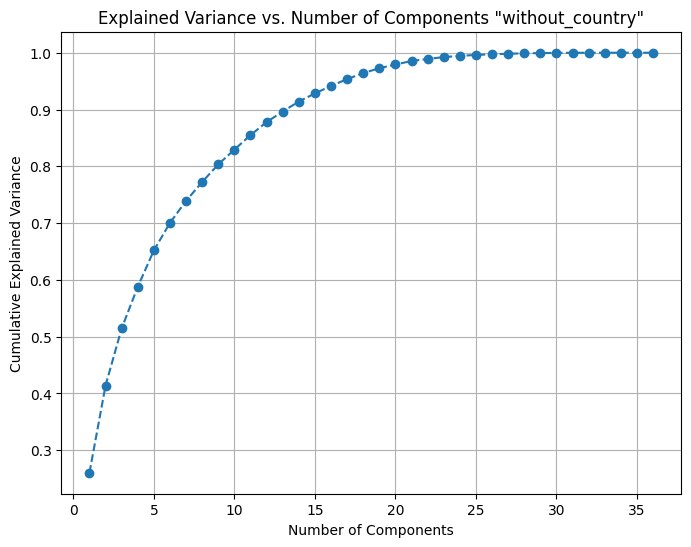

Number of components to retain for 97% variance: 19


In [88]:
pca = PCA()
X_pca = pca.fit_transform(X_temp_without_country_sc)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components "without_country"')
plt.grid()
plt.show()

# Determine the number of components to retain (e.g., 97% of variance)
n_components_to_retain = np.argmax(cumulative_variance >= 0.97) + 1
print(f'Number of components to retain for 97% variance: {n_components_to_retain}')

# Perform PCA again with the chosen number of components
pca = PCA(n_components=n_components_to_retain)
X_final = pca.fit_transform(X_temp_without_country_sc)

In [89]:
#Standard PCA with year and country  
# encode country  
country_column = X_temp['country'].values 

le = LabelEncoder()
encoded_country = le.fit_transform(country_column)

X_temp['encoded_country'] = encoded_country
X_temp_country_sc = X_temp.copy()
X_temp_country_sc.drop(columns=['country'],inplace=True)

# scale data

X_temp_country_sc = scaler.fit_transform(X_temp_country_sc)

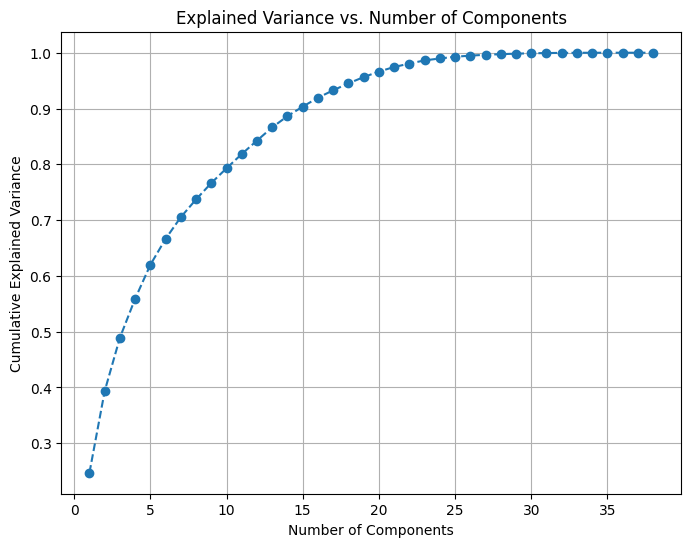

Number of components to retain for 95% variance: 21


In [90]:
pca = PCA()
X_pca = pca.fit_transform(X_temp_country_sc)

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance ratio
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Determine the number of components to retain (e.g., 95% of variance)
n_components_to_retain = np.argmax(cumulative_variance >= 0.97) + 1
print(f'Number of components to retain for 95% variance: {n_components_to_retain}')

# Perform PCA again with the chosen number of components
pca = PCA(n_components=n_components_to_retain)
X_final_country = pca.fit_transform(X_temp_country_sc)

In [91]:
### Kernel PCA


In [92]:

from sklearn.decomposition import KernelPCA

In [94]:
X_temp_without_country_sc_array = X_temp_without_country_sc.values
missing_values = np.isnan(X_temp_without_country_sc_array)
print(missing_values.sum())

0


In [95]:


X_temp_without_country_sc_array.shape

(2266, 36)

In [96]:
# Kernel PCA with no country or year
# X_temp_without_country_sc_array = X_temp_without_country_sc.values


In [98]:
# kpca = KernelPCA(kernel='rbf', gamma=15, n_components=1)
# X_kpca = kpca.fit_transform(X_temp_country_sc)

# # Convert X_kpca to a numpy array
# X_kpca = np.array(X_kpca)

# # Plot the original data and the transformed data
# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("Original Data")
# plt.scatter(X_temp_country_sc[:, 0], X_temp_country_sc[:, 1])

# plt.subplot(1, 2, 2)
# plt.title("Kernel PCA")
# plt.scatter(X_kpca[:, 0], np.zeros(X_kpca.shape[0]))
# plt.xlabel("First Principal Component (Transformed Space)")
# plt.tight_layout()
# plt.show()


In [100]:
# X_temp_without_country_sc_array = X_temp_without_country_sc.values

# kpca = KernelPCA(n_components=2, kernel='linear')
# X_kpca = kpca.fit_transform(X_temp_without_country_sc_array)

In [101]:
# kpca = KernelPCA(kernel='linear', fit_inverse_transform=False, n_components=2).fit_transform(X_temp_without_country_sc_array[0:1000, :])

# plt.figure(figsize=(10, 5))

# plt.subplot(1, 2, 1)
# plt.title("Original Data")
# plt.scatter(X_temp_without_country_sc_array[0:1000, 0], X_temp_without_country_sc_array[0:1000, 1])

# plt.subplot(1, 2, 2)
# plt.title("Kernel PCA with no country or year")
# plt.scatter(kpca[:, 0], kpca[:, 1])
# plt.xlabel("First Principal Component (Transformed Space)")
# plt.ylabel("Second Principal Component (Transformed Space)")
# plt.tight_layout()
# plt.show()



In [107]:
#Independent Component Analysis (ICA) example

from sklearn.decomposition import PCA, FastICA



c:\Users\M\desktop\sp_ts\Final_Project_Water_Management\.amwag\Lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


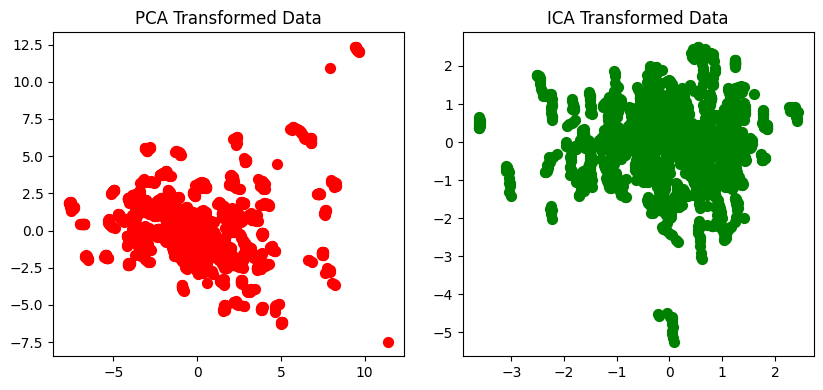

In [108]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=19)
X_pca = pca.fit_transform(X_temp_without_country_sc)

# Perform ICA to separate independent components
ica = FastICA(n_components=10)
X_ica = ica.fit_transform(X_temp_without_country_sc)

# Plot the original data, PCA-transformed data, and ICA-transformed data
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 2)
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c='r', marker='o', s=50)
plt.title("PCA Transformed Data")

plt.subplot(1, 3, 3)
plt.scatter(X_ica.iloc[:, 0], X_ica.iloc[:, 1], c='g', marker='o', s=50)
plt.title("ICA Transformed Data")

plt.tight_layout()
plt.show()

In [109]:

scores = np.dot(X_ica, ica.mixing_.T)
scores

array([[-1.71652556, -1.52079846, -0.21784769, ..., -1.80306706,
         0.76096986,  0.97415097],
       [ 0.00468935,  0.0561572 , -0.01782567, ...,  0.58722824,
        -0.48728453, -0.17548464],
       [-0.5547817 ,  0.32048043,  0.41472134, ...,  0.07738882,
         0.19337726,  0.33878269],
       ...,
       [-0.91434738, -0.72860639,  1.45850199, ..., -2.04419326,
        -2.08448397, -0.45606522],
       [-1.05036013, -1.14798084,  1.25578647, ..., -1.52040631,
         1.66613693, -0.01458359],
       [-0.64128752, -0.16440927,  1.58359153, ...,  0.25802441,
        -0.61344813, -0.48929482]])

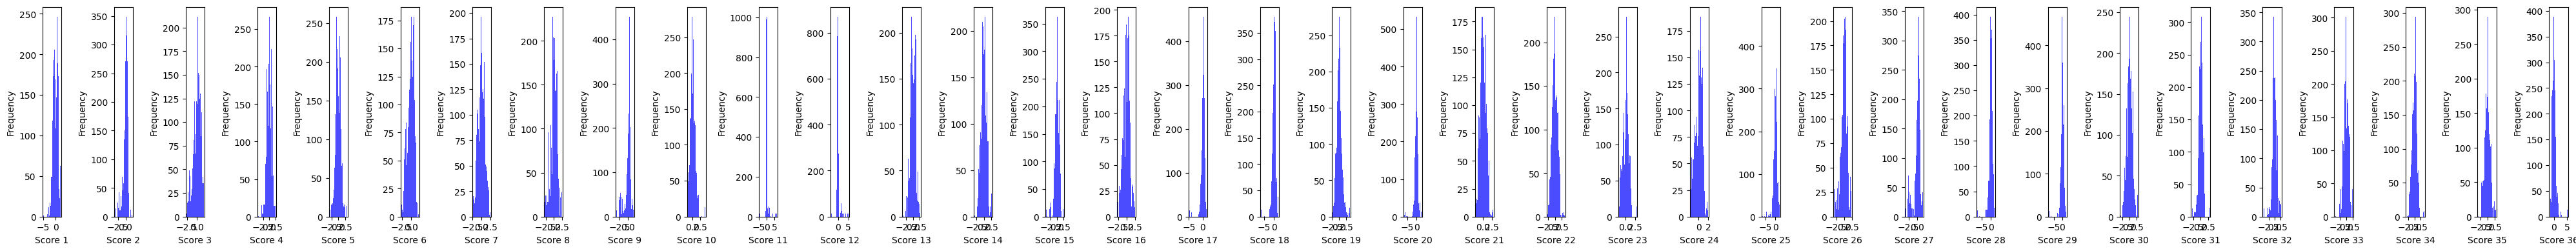

In [110]:
plt.figure(figsize=(40, 4))

for i in range(scores.shape[1]):
    plt.subplot(1, scores.shape[1], i + 1)
    plt.hist(scores[:, i], bins=30, color='b', alpha=0.7)
    plt.xlabel(f"Score {i + 1}")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()